In [24]:
import numpy as np
import matplotlib.pyplot as plt

probability_win = 0.25
DISCOUNT_FACTOR = 1
reward_table = np.zeros(101)
reward_table[100] = 1

class StrategyUpdater:
    def __init__(self):
        self.value_states = np.zeros(101)
        self.optimal_strategy = np.zeros(100, dtype=int)
        
    def calculate_value(self, position, bet, value_states):
        win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def evaluate_strategy(self, tolerance=1e-14):
        while True:
            # TODO: Evaluate state values for the current strategy until convergence
            # Convergence: The difference in state values between iterations is less than tolerance
            delta = 0
            new_value_states = self.value_states.copy()

            for position in range(1, 100):
                bet = self.optimal_strategy[position]
                # bet should be +int
                if bet > 0:
                    new_value_states[position] = self.calculate_value(position, bet, self.value_states)

                delta = max(delta, abs(new_value_states[position] - self.value_states[position]))

            self.value_states = new_value_states
            # chcek for convergence
            if delta < tolerance:
                break

        return self.update_strategy()

    def evaluate_strategy_with_equations(self):
        Coefficients = np.zeros((99, 99), dtype=np.float64) 
        Constants = np.zeros(99, dtype=np.float64)

        for position in range(1, 100):
            index_position = position - 1
            Coefficients[index_position, index_position] = 1.0
            max_action = min(position, 100 - position)
            for bet in range(1, max_action + 1):
                if position + bet < 100:
                    # position + bet - 1 -> -1  is for: I suppose state i in the matrix pos = i - 1
                    Coefficients[index_position, position + bet - 1] -= probability_win * DISCOUNT_FACTOR
                else:
                    # when the bet causes to terminal state, we have Reward = 1, constant = p * Reward
                    Constants[index_position] += probability_win
                if position - bet > 0:
                    Coefficients[index_position, position - bet - 1] -= (1 - probability_win) * DISCOUNT_FACTOR

        V = np.linalg.solve(Coefficients, Constants)
        self.value_states[1:100] = V
        return self.update_strategy()

    def update_strategy(self):
        policy_stable = True
        for position in range(1, 100):
            best_bet = 0
            best_value = 0
            # new_value_states = self.value_states.copy()
            max_action = min(position, 100 - position)
            for bet in range(1, max_action + 1):
                value = self.calculate_value(position, bet, self.value_states)
                if value > best_value:
                    best_value = value
                    best_bet = bet
            if self.optimal_strategy[position] != best_bet:
                policy_stable = False
            self.optimal_strategy[position] = best_bet

        # policy improve, so evaluate values again    
        if policy_stable != True:
            return self.evaluate_strategy()
        return self.value_states, self.optimal_strategy


[0.00000000e+00 7.28611683e-05 2.91444673e-04 6.95264571e-04
 1.16577869e-03 1.77125506e-03 2.78105828e-03 4.03661211e-03
 4.66311477e-03 5.60141644e-03 7.08502024e-03 9.04088770e-03
 1.11242331e-02 1.56796459e-02 1.61464484e-02 1.69534413e-02
 1.86524591e-02 1.98260623e-02 2.24056658e-02 2.73847344e-02
 2.83400810e-02 3.04945467e-02 3.61635508e-02 3.84959101e-02
 4.44969325e-02 6.25000000e-02 6.27185835e-02 6.33743340e-02
 6.45857937e-02 6.59973361e-02 6.78137652e-02 7.08431749e-02
 7.46098363e-02 7.64893443e-02 7.93042493e-02 8.37550607e-02
 8.96226631e-02 9.58726994e-02 1.09538938e-01 1.10939345e-01
 1.13360324e-01 1.18457377e-01 1.21978187e-01 1.29716997e-01
 1.44654203e-01 1.47520243e-01 1.53983640e-01 1.70990652e-01
 1.77987730e-01 1.95990798e-01 2.50000000e-01 2.50218584e-01
 2.50874334e-01 2.52085794e-01 2.53497336e-01 2.55313765e-01
 2.58343175e-01 2.62109836e-01 2.63989344e-01 2.66804249e-01
 2.71255061e-01 2.77122663e-01 2.83372699e-01 2.97038938e-01
 2.98439345e-01 3.008603

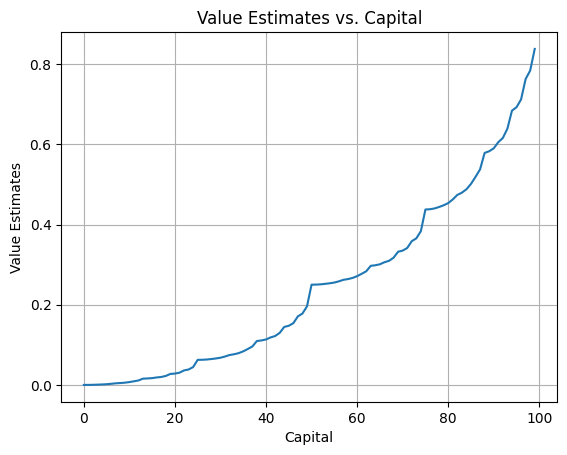

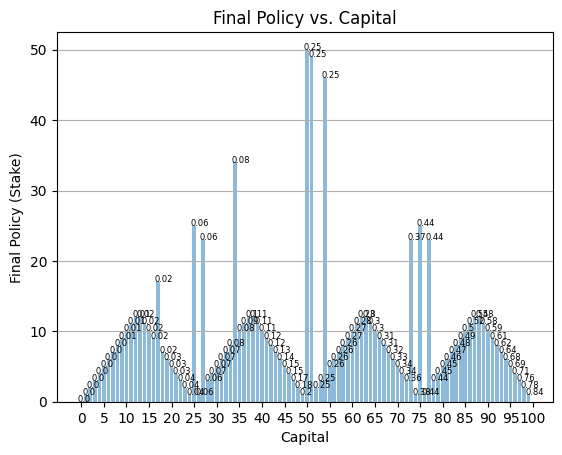

In [26]:
su = StrategyUpdater()
value_estimates, final_strategy = su.evaluate_strategy_with_equations()
# TODO: perform this once by solving equations too
print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()

# Policy evaluation with iteration
for p = 0.25

<img src="imges/output5.png" width="400" height="200">
<img src="imges/output6.png" width="400" height="200">


for p = 0.55

<img src="imges/output7.png" width="400" height="200">
<img src="imges/output8.png" width="400" height="200">

# Policy evaluation with linear equation
for p = 0.25

<img src="imges/output11.png" width="400" height="200">
<img src="imges/output12.png" width="400" height="200">


for p = 0.55

<img src="imges/output13.png" width="400" height="200">
<img src="imges/output14.png" width="400" height="200">

## Conclusion
The policy evaluation with iteration is slower than with linear equation and it is related to Discount_Factor and tolerance(in the method with iterations), but with linear equation it is much faster than the other one.

In [9]:
# Implementing value iteration and strategy improvement algorithms
probability_win = 0.25
DISCOUNT_FACTOR = 1
reward_table = np.zeros(101)
reward_table[100] = 1

class ValueCalculator:
    def __init__(self):
        self.value_states = np.zeros(101, dtype=np.float64)
        self.optimal_strategy = np.zeros(100, dtype=np.float64)

    def calculate_value(self, position, bet, value_states):
        win_outcome = probability_win * (reward_table[position + bet] + DISCOUNT_FACTOR * value_states[position + bet])
        lose_outcome = (1 - probability_win) * (reward_table[position - bet] + DISCOUNT_FACTOR * value_states[position - bet])
        return win_outcome + lose_outcome

    def perform_value_iteration(self, tolerance=1e-50):
        while True:
            delta = 0
            new_value_states = self.value_states.copy()

            for position in range(1, 100):  # Skip terminal states
                best_value = 0
                max_action = min(position, 100 - position)
                # Iterate over all valid bets
                for bet in range(1, max_action + 1):
                    value = self.calculate_value(position, bet, self.value_states)
                    best_value = max(best_value, value)

                new_value_states[position] = best_value
                delta = max(delta, abs(self.value_states[position] - best_value))

            self.value_states = new_value_states

            # Check for convergence
            if delta < tolerance:
                break
        return self.perform_strategy_update()

    def perform_strategy_update(self):
        for position in range(1, 100):
            optimal_action = 0
            best_value = 0
            max_action = min(position, 100 - position)
            for bet in range(1, max_action + 1):
                value = self.calculate_value(position, bet, self.value_states)
                if value > best_value:
                    best_value = value
                    optimal_action = bet
            # print(best_value)
            self.optimal_strategy[position] = optimal_action
        return self.value_states, self.optimal_strategy


[0.00000000e+00 7.28611683e-05 2.91444673e-04 6.95264571e-04
 1.16577869e-03 1.77125506e-03 2.78105828e-03 4.03661211e-03
 4.66311477e-03 5.60141644e-03 7.08502024e-03 9.04088770e-03
 1.11242331e-02 1.56796459e-02 1.61464484e-02 1.69534413e-02
 1.86524591e-02 1.98260623e-02 2.24056658e-02 2.73847344e-02
 2.83400810e-02 3.04945467e-02 3.61635508e-02 3.84959101e-02
 4.44969325e-02 6.25000000e-02 6.27185835e-02 6.33743340e-02
 6.45857937e-02 6.59973361e-02 6.78137652e-02 7.08431749e-02
 7.46098363e-02 7.64893443e-02 7.93042493e-02 8.37550607e-02
 8.96226631e-02 9.58726994e-02 1.09538938e-01 1.10939345e-01
 1.13360324e-01 1.18457377e-01 1.21978187e-01 1.29716997e-01
 1.44654203e-01 1.47520243e-01 1.53983640e-01 1.70990652e-01
 1.77987730e-01 1.95990798e-01 2.50000000e-01 2.50218584e-01
 2.50874334e-01 2.52085794e-01 2.53497336e-01 2.55313765e-01
 2.58343175e-01 2.62109836e-01 2.63989344e-01 2.66804249e-01
 2.71255061e-01 2.77122663e-01 2.83372699e-01 2.97038938e-01
 2.98439345e-01 3.008603

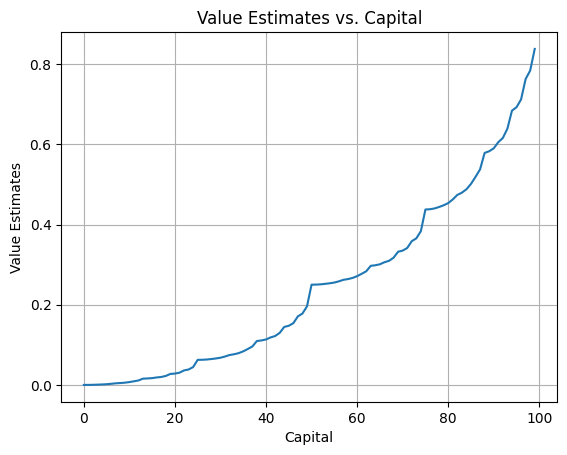

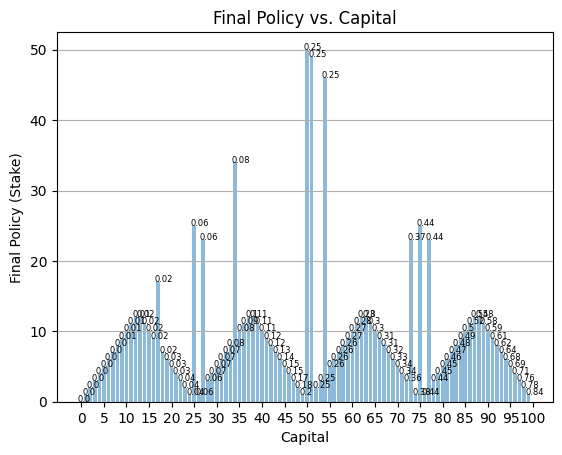

In [10]:
# Initialize and run value iteration
vc = ValueCalculator()
value_estimates, final_strategy = vc.perform_value_iteration()
print(value_estimates)
print(final_strategy)

# Plotting the value estimates
plt.plot(range(100), value_estimates[:100])
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value Estimates vs. Capital')
plt.grid(True)
plt.show()

# Plotting the final policy
plt.bar(range(100), final_strategy, align='center', alpha=0.5)
for idx in range(100):
    plt.text(idx - 0.75, final_strategy[idx] + 0.01, str(round(value_estimates[idx], 2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final Policy (Stake)')
plt.title('Final Policy vs. Capital')
plt.grid(axis='y')
plt.show()


# Value iteration
each policy is the value of being in that state (which is a bit hard to see). We see that this has this strange looking format with a few pyramid shapes and larger “all-in” spikes at 25, 50, and 75. Betting large when the odds are against us makes sense in order to play with maximum variance – if we instead bet small, then we would see much lower variance and therefore a lower chance of reaching 100. (Imagine we are at state 50 – if we bet all 50, we have a 0.4 chance of winning. If we bet 1, we would need to win 50 times in a row, which is 0.4^50 ~= 0.)

for p = 0.25

<img src="imges/output1.png" width="400" height="200">
<img src="imges/output2.png" width="400" height="200">


Once p goes above 0.5, the final policy turns into simply betting 1 at every state (we do not use discounting). This is because the odds are now actually in our favor, so we prefer to keep variance as low as possible.

for p = 0.55

<img src="imges/output3.png" width="400" height="200">
<img src="imges/output4.png" width="400" height="200">

## The effect of the value of the tolerance
### for p = 0.25 and tolerance=1e-50
<img src="imges/output1.png" width="400" height="200">
<img src="imges/output2.png" width="400" height="200">

### for p = 0.25 and tolerance=1e-5
<img src="imges/output9.png" width="400" height="200">
<img src="imges/output10.png" width="400" height="200">